<a href="https://colab.research.google.com/github/kefsaj/CS652Image-Compression/blob/main/semifinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image-Compression

You are an engineer in Shutterstock and responsible for optimizing the web experience on the site. You will serve images that exhibit minimal distortion at the best possible storage efficiency. You need to come up with a python implementation that takes images in and compresses them to satisfy the requirements found [here](https://github.com/kefsaj/CS652Image-Compression).

Full Requirements can be found [here](

This project was created with support of: 
*   [Zigzag-Scan](https://github.com/asad82/Zigzag-Scan) By asad82
*   [compression-DCT](https://github.com/getsanjeev/compression-DCT) By getsanjeev
*   [ImageCompression](https://github.com/faizanayubi/ImageCompression) By faizanayubi

*   [dct-image-compression](https://github.com/samueldemoura/dct-image-compression) By samueldemoura
*   [simple-JPEG-compression](https://github.com/amzhang1/simple-JPEG-compression) By amzhang1
*   [Images, Compression, and Coding](http://www.eecs.umich.edu/courses/eecs206/archive/fall03/public/lab/lab5/lab5.pdf)





.

Zigzag *Scanner*  Created By Alex Nickel

 Zigzag scan of a matrix
 Argument is a two-dimensional matrix of any size,
 not strictly a square one.
Function returns a 1-by-(m*n) array,
where m and n are sizes of an input matrix,
consisting of its items scanned by a zigzag method.

Matlab Code:
Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
June 2007
alex.nickel@gmail.com


In [36]:
# Zigzag scan of a matrix
# Argument is a two-dimensional matrix of any size,
# not strictly a square one.
# Function returns a 1-by-(m*n) array,
# where m and n are sizes of an input matrix,
# consisting of its items scanned by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com

import numpy as np

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output



evaluate the R(D) function of the DCT-transformed image using this independent (yet non-identical) assumption.

In [37]:
!pip install Pillow

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
import numpy as np

import math 
import cv2
import sys

import matplotlib
%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import scipy
from scipy.fftpack import dct
from scipy import signal
from scipy import misc 
import PIL

import seaborn 
import cvxpy as cp

block size used in the compression scheme is 8x8 and defining 2d dct and idct

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


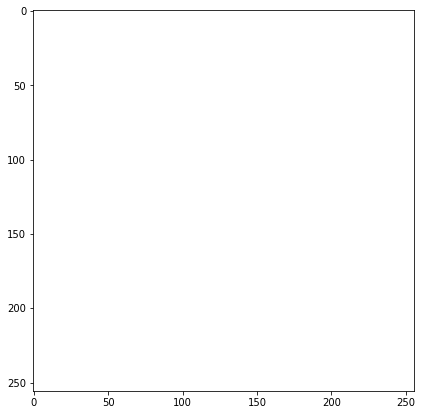

In [38]:
blockSize = 8

IMGLOCATION ="/content/drive/MyDrive/CS652101-Network-ArchProtocols/semifinal/bird.tif"
IMGLOCATION2 = "/content/drive/MyDrive/CS652101-Network-ArchProtocols/semifinal/lena2.tif"

# reading the image
img = cv2.imread(IMGLOCATION, cv2.IMREAD_GRAYSCALE)
im = cv2.imread(IMGLOCATION).astype(float)

#DCT init
def dct2d(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2d(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

# Show imported image 

f = plt.figure()
plt.imshow(im,cmap='gray')

In [39]:
# Quantization Matrix 
quantArray = np. array(
    [[ 0,  1,  5,  6, 14, 15, 27, 28 ],
       [ 2,  4,  7, 13, 16, 26, 29, 43 ],
       [ 3,  8, 12, 17, 25, 30, 42, 47 ],
       [ 9, 11, 18, 24, 31, 41, 48, 61 ],
       [10, 19, 23, 32, 40, 49, 60, 66 ],
       [20, 22, 33, 39, 50, 59, 67, 76 ],
       [21, 34, 38, 51, 58, 68, 75, 81 ],
       [35, 37, 52, 57, 69, 74, 82, 87 ],
      ])

Padding the image and Multiplying bloack size by the number of blocks to get the padded image size

In [40]:
[ht,wd] = img.shape
display(wd,ht)

width = wd
height = ht

w = np.float32
h = np.float32

#calculate the height and width of padded img
nw = math.ceil((wd)/(blockSize))
nw = np.int32(nw)

nh = math.ceil((ht)/(blockSize))
nh = np.int64(nh)

#width 
imgWidth = (blockSize*nw)
#height
ImgHeight = (blockSize*nh)

paddedImage = np.zeros((ImgHeight,imgWidth))


#paddedImage[0:height,0:width] = img[0:height, 0:width]    
cv2.imwrite('uncompressed.bmp', np.uint8(paddedImage))

256

256

True

Do DCT

In [41]:

imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2d( im[i:(i+8),j:(j+8)] )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Comparison between original, DCT compressed and DFT compressed images')

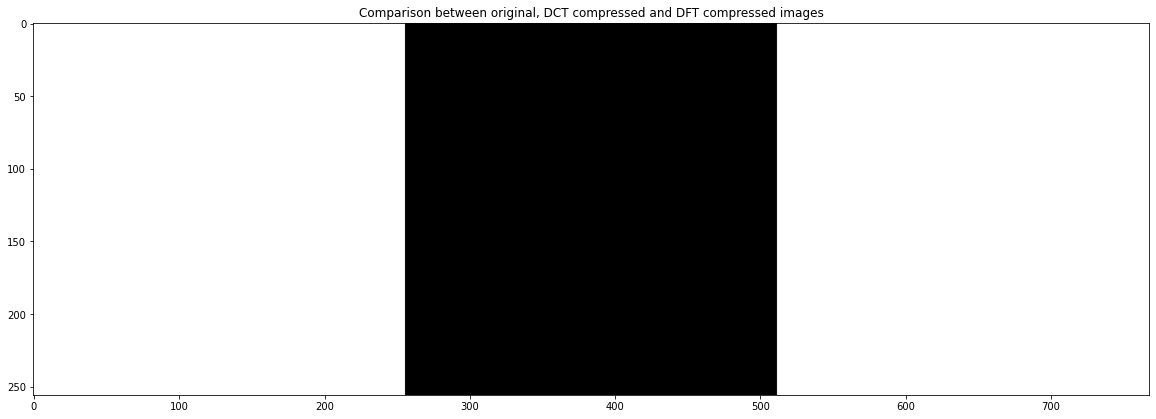

In [52]:
dft = zeros(imsize,dtype='complex');
im_dft = zeros(imsize,dtype='complex');
im_dct = np.zeros(imsize)

# 8x8 DFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2( im[i:(i+8),j:(j+8)] )

# Thresh
thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
#print "Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0)
#print "Keeping only %f%% of the DFT coefficients" % (percent_nonzeros_dft*100.0)

# 8x8 iDFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct, abs(im_dft)) ) ,cmap='gray')
plt.title("Comparison between original, DCT compressed and DFT compressed images" )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'An 8x8 DCT block')

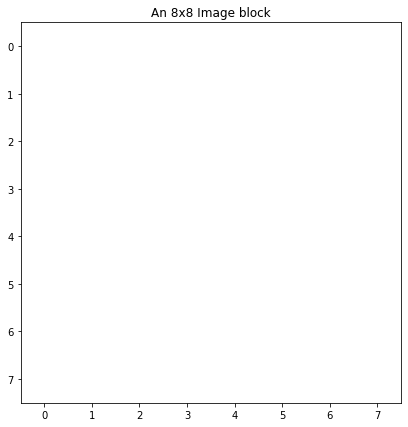

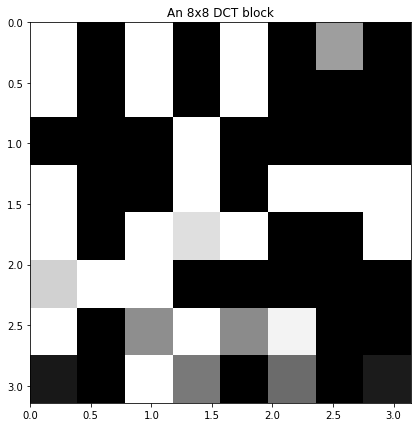

In [42]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

Run-length encoding (RLE) is a form of lossless data compression in which runs of data (sequences in which the same data value occurs in many consecutive data elements) are stored as a single data value and count, rather than as the original run.





In [43]:
def RunlengthEncoding(img):
    i = 0
    skip = 0
    strm = []    
    bitstr = ""
    img = img.astype(int)
    while i < img.shape[0]:
        if img[i] != 0:            
            strm.append((img[i],skip))
            bitstr = bitstr + str(img[i])+ " " +str(skip)+ " "
            skip = 0
        else:
            skip = skip + 1
        i = i + 1

    return bitstr

Encoding Part:


In [44]:
for i in range(nh):

  rowIndex1 = i* blockSize
  rowIndex2 = rowIndex1 + blockSize
  #find the starting and ending index of the block in terms of row

  for j in range(nw):
    colIndex1 = i* blockSize
    colIndex2 = rowIndex1 + blockSize
    #find the starting and ending index of the block in terms of columns

    block = paddedImage[rowIndex1 : rowIndex2, colIndex1 : colIndex2]

    DCT = cv2.dct(block)

    DCTnormaled = np.divide(DCT,quantArray).astype(int)

    #using zigzag to find DCT coeffs 
    reOrder = zigzag(DCTnormaled)
    
    #shaping to 8x8 formatization 
    reshaped = np.reshape(reOrder, (blockSize, blockSize))

    paddedImage[rowIndex1 : rowIndex2, colIndex1 : colIndex2] = reshaped



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


Display DCT blocks

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '8x8 DCTs of the image')

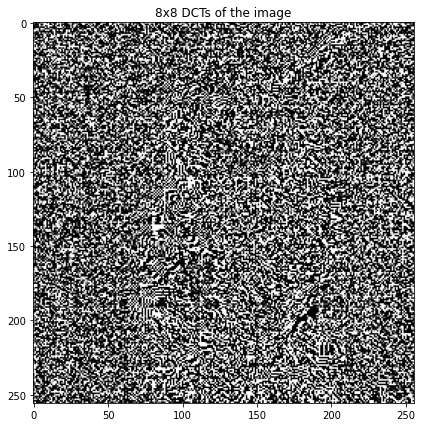

In [45]:

# Display DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Results

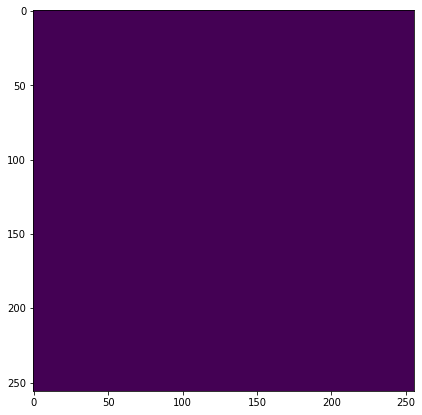

In [48]:
plt.figure()
plt.imshow(np.uint8(paddedImage))
arranged = paddedImage.flatten()

Saving results

In [49]:

bitstream = RunlengthEncoding(arranged)
bitstream = str(paddedImage.shape[0])+" "+str(paddedImage.shape[1])+" "+bitstream +";"

#write to file
textFile = open("results.txt", "w")
textFile.write(bitstream)
textFile.close()

cv2.waitKey(0)

-1